## Name: Franklin Limaico

# Homework 2: Exoplanets

The homework should be submitted as a python notebook. Make all the plots in the python notebook.

Please email the homework to hdenes@yachaytech.edu.ec by the <b>end of the day (midnight) by the 29th of November.</b>

Total points: 20

Please let me know if you have any questions. 

<b>Important notes: </b> 
- The tutorial notebooks contain the methods that you can use to solve the homework. 
- If you have problems with some of the specific astrophysics packages, make sure to check the versions. Not all versions of the packages are compatible with each other. 
- exercise 2 uses the lightkurve package which you should be able to install with pip. It works in google collab too. I have tested it. 


## 1. (15 points) Analysing properties of Exoplanets

The goal of this exercise is to analyse overall properties of exoplanets based on the data from the European exoplanet data base: http://exoplanet.eu/catalog/ Statistical studies of exoplanets and the properties of their host stars are critical for understanding planet formation.


1. Download the relevant data. You can do this by either downloading the full catalogue from the website or trough python using ADQL commands. 
2. Make sure that you only have relevant data for planets. For this, think about the definition of a planet and exclude all data that does not satisfy the definition. Briefly describe your decision about excluding irrelevant data.
3. Make a scatter plot of Semi-major axis vs. Calculated temperature. And make histograms of both Semi-major axis and temperature.
4. What can you conlcude from the plots in #3? Is there a relation between the two parameters? Briefly explain what is the reason for the relation if there is one? 
5. Make a scatter plot of Effective temperature of the host star vs. planetary mass. Make histograms of both quantities. 
6. Describe the plots that you created in #5. What can you conclude from these plots? Brielfy explain your conclusions. 
7. In class we discussed that planets, in particular gas giants, are more common around metall rich stars. Can you show some evidence for this using histograms, scatter plots and number counts? Tip: You may want to select specific data for this.
8. Briefly explain and describe what you found based on the plots in #7. 
9. Make a scatter plot of mass vs. radius. Make sure to have both axes in log scale. 
10. There is a known gap in the radius of planets. Can you find where this gap is in the plot from #9? Is there also a gap in the mass of planets? What does this suggest? 
11. Is there anything else that you can conclude from #9? Mark where the gap is, you can use a square or a circle on the figure. Briefly explain your observation. 
12. Calcualte the density of the exoplanets and make a histogram. Compare the histogram with the density of Earth and Jupiter. What do you find?
13. Where are planets found? Plot the on sky position (R.A. and Dec) of all known exoplanets. What can you conclude from this. 
14. Plot histograms of the host stars distance, mass and temperature. 
15. What can you conclude from the plots in #13? Are these conclusions physically meaningfull or the result of some bias? 

Tips: 
- Some plots show information better on a log scale and some show information better on a linear scale. Make sure that you choose the scale of the axes of your plots appropriately. 
- Make sure to choose the bin size for histograms well. The goal is to have equally sized bins and to be able to see the shape of the distribution. 

# Solution:

### Como funciona np.where?

Es una funcion que trabaj sobre arrays de python. La estructura es la siguiente:

np.where(condicion, output if the condition is true, condition if the condition is false)

Cuando se llama a la funcion completa con todos sus parametros, crea un nuevo array, en base al array al cual estas poniendo la condicion, que contiene la los datos del array original pero habiendole aplicado la condicion.

Si solo se llama a la funcion solo con la condicion, el resultado sera un arrays con los indices del array que cumplen la condicion. xd La combinacion de esto es lo que hace que trabaje tan bien las funcion xd

**1. Download the relevant data. You can do this by either downloading the full catalogue from the website or trough python using ADQL commands.**

**Source: Exoplanets_v2.ipynb**


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy import units as u
from reproject import reproject_interp
import csv
from astropy.io import ascii
import pandas as pd

In [2]:
!ls

Homework_2_Planets.ipynb  myresults.npy  test.png
exoplanet.eu_catalog.csv  myresults.xml


In [3]:
data = pd.read_csv('exoplanet.eu_catalog.csv')

In [59]:
type(data)

# Example 1: Get the index use df.index property
#print(data.index)

# Example 2: Get the index use index.values
#print(list(data.index.values))

# Example 3: Get the index use tolist()
#print(list(df.index.values.tolist()))

# Example 4: Get the column index use get_loc()
#print(data.columns.get_loc('mass'))

# Example 5: Get the index values using np.where()
#print(list(np.where(data["mass"] > 12)))

#print(np.where(data["mass"] > 12))

RangeIndex(start=0, stop=5543, step=1)


### Como funciona np.where?

Es una funcion que trabaj sobre arrays de python. La estructura es la siguiente:

np.where(condicion, output if the condition is true, condition if the condition is false)

Cuando se llama a la funcion completa con todos sus parametros, crea un nuevo array, en base al array al cual estas poniendo la condicion, que contiene la los datos del array original pero habiendole aplicado la condicion.

Si solo se llama a la funcion solo con la condicion, el resultado sera un arrays con los indices del array que cumplen la condicion. xd La combinacion de esto es lo que hace que trabaje tan bien las funcion xd


In [10]:
#data.keys()

**2. Make sure that you only have relevant data for planets. For this, think about the definition of a planet and exclude all data that does not satisfy the definition. Briefly describe your decision about excluding irrelevant data.**


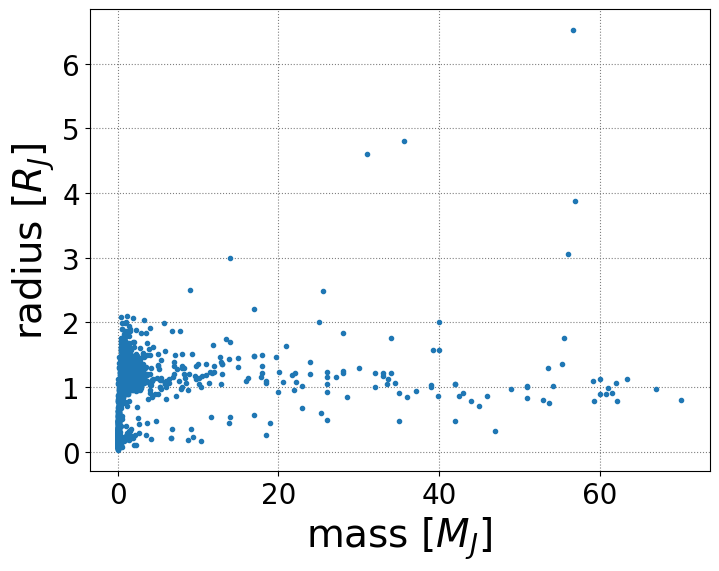

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['mass'], data['radius'], marker = '.', linestyle='')
plt.xlabel("mass [$M_J$]", fontsize=28)
plt.ylabel('radius [$R_J$]', fontsize=28)

#plt.xlim(-300,600)
#plt.ylim(0,1.02)  
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

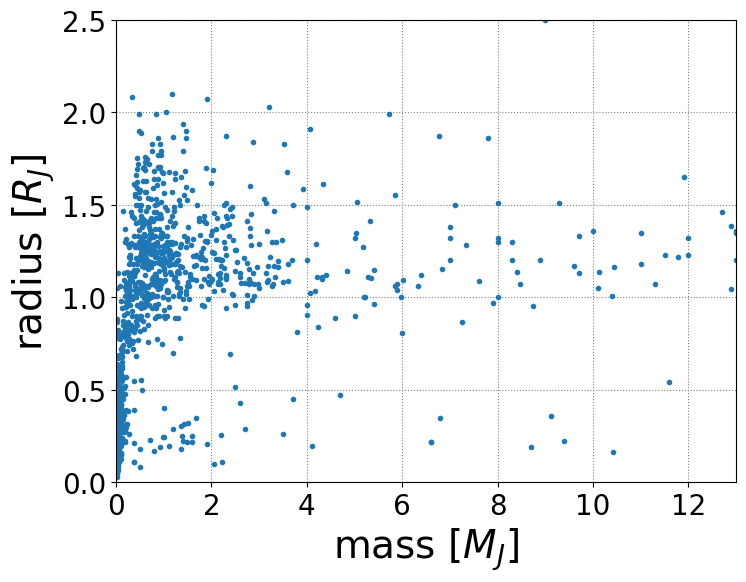

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['mass'], data['radius'], marker = '.', linestyle='')
plt.xlabel("mass [$M_J$]", fontsize=28)
plt.ylabel('radius [$R_J$]', fontsize=28)

plt.xlim(0.00,13)
plt.ylim(0,2.5)  
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('./test.png', dpi=200)

We use the mass to isolate the relevant data.

How to isolate the data?

**3. Make a scatter plot of Semi-major axis vs. Calculated temperature. And make histograms of both Semi-major axis and temperature.**

A vs. B

A = y axis, B = x axis

ie. Graph temperature vs. time


In [50]:
temp_calculated = data['temp_calculated']
semi_major_axis = data['semi_major_axis']

In [65]:
# Filtra los elementos que no son NaN
temp_no_nan = temp_calculated[~np.isnan(temp_calculated)]
semi_major_no_nan = semi_major_axis[~np.isnan(semi_major_axis)]


# Imprime el nuevo array
print(temp_no_nan.shape)
print(semi_major_no_nan.shape)    

(1255,)
(3750,)


In [80]:
#print(list(np.where(temp_no_nan > 12)))

#print(len(temp_no_nan))
#temp_no_nan.index.values
#semi_major_no_nan.index.values

arrays = []
#Return an array with the same indices for both arrays!:
for i in temp_no_nan.index.values:
    for j in semi_major_no_nan.index.values:
        if i==j:
            arrays.append(i)

arrays = np.array(arrays)
#print(len(arrays))

new_tem_calculated = []
new_semi_major = []  

for i in arrays:
    new_tem_calculated.append(temp_no_nan[i])
    new_semi_major.append(semi_major_no_nan[i])
    
new_tem_calculated = np.array(new_tem_calculated)
new_semi_major = np.array(new_semi_major)

print(new_tem_calculated,new_semi_major)
    

[ 700.  1217.   569.5 ... 1641.  1577.  1612. ] [11.1      0.0436   0.08305 ...  0.05485  0.0815   0.04329]


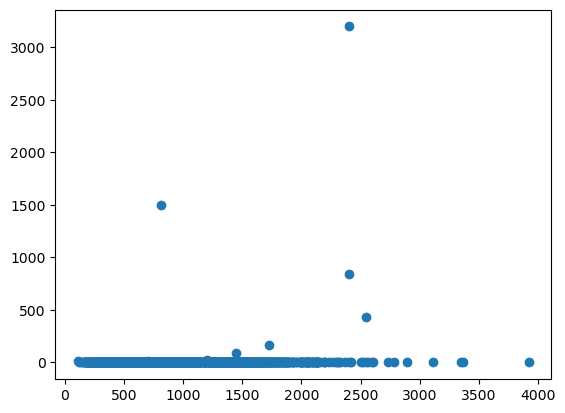

In [83]:
plt.scatter(data['temp_calculated'], data['semi_major_axis'])

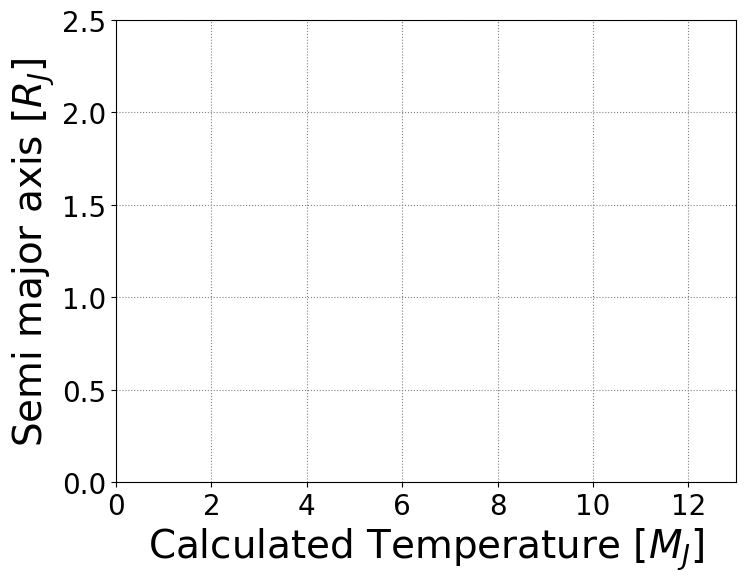

In [81]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['temp_calculated'], data['semi_major_axis'], marker = '.', linestyle='')
plt.xlabel("Calculated Temperature [$M_J$]", fontsize=28)
plt.ylabel('Semi major axis [$R_J$]', fontsize=28)

plt.xlim(0.00,13)
plt.ylim(0,2.5)  
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('./test.png', dpi=200)

**4. What can you conlcude from the plots in #3? Is there a relation between the two parameters? Briefly explain what is the reason for the relation if there is one?** 


**5. Make a scatter plot of Effective temperature of the host star vs. planetary mass. Make histograms of both quantities.**

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['temp_calculated'], data['semi_major_axis'], marker = '.', linestyle='')
plt.xlabel("Calculated Temperature [$M_J$]", fontsize=28)
plt.ylabel('Semi major axis [$R_J$]', fontsize=28)

plt.xlim(0.00,13)
plt.ylim(0,2.5)  
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('./test.png', dpi=200)

## 2. (5 points) Finding Exoplanets in transit data 

The goal of this exercise is to analyse data from the Kepler satellite and identify planets with the transit method. 

1. Follow the tutorial and download data from the Kepler mission for the star: Kepler-23.
2. Prepare the data to search for planets, for this normalize the flux and remove the outliers.
3. Search for planets in the data. How many planets can you find in the dataset?
4. Make a plot of the folded lightcurve for all identified planets.
5. Include the model for all of the planets in the folded lightcurve plot. 

Tip: If you find more than one planet check if the periods that you found are not multiples of each other. 